## How to Test for Normality in Python (4 Methods)

### 0. Author: Muhammad Arif Ghouri
> Submission Date: \
> Contact Info: 
> - Email:
> - GitHub:
> - Kaggle:
> - LinkedIn:
> - Twitter:
> - Medium:


There are six common ways to check this assumption of normal distribution in Python:

#### 1. (Visual Method) Create a histogram.

  If the histogram is roughly “bell-shaped”, then the data is assumed to be normally distributed.

> Visual Method 1-1 : Create a Histogram (with normal dist fit-PDF)\
>The following pyhton code shows how to create a histogram for a titanic built in dataset (titanic['age'])

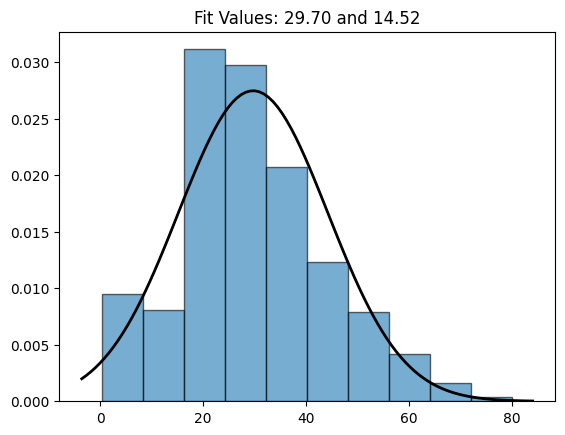

In [4]:
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate some data for this
# demonstration.
df=sns.load_dataset('titanic')
data=df['age']
data=data.dropna()
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(data)

# Plot the histogram.
#plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

plt.hist(data, density=True, alpha=0.6, edgecolor='black')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()


> Visual Method 1-2: Create a Histogram\
>The following pyhton code shows how to create a histogram for a dataset that follows a (y=ln(x), loge ) Standard log-normal >distribution with μ = 0 and σ = 1

(array([110., 307., 247., 168.,  84.,  37.,  28.,  10.,   3.,   3.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.59044299,  1.54462417,  2.49880535,  3.45298653,  4.40716771,
         5.36134889,  6.31553007,  7.26971125,  8.22389243,  9.17807361,
        10.13225479, 11.08643597, 12.04061715, 12.99479833, 13.94897951,
        14.90316069, 15.85734187, 16.81152305, 17.76570423, 18.71988542,
        19.6740666 ]),
 <BarContainer object of 20 artists>)

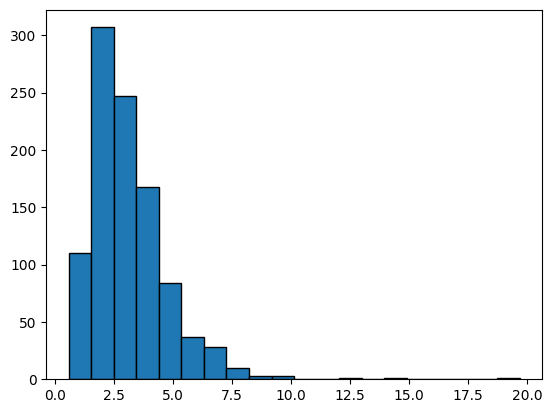

In [15]:

import math as math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset(randon variates) that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#generate log-normal distributed random variable with 1000 values
#lognorm_values = lognorm.rvs(s=1, scale=math.exp(1), size=1000)


#view first five values
#lognorm_values[:5]

#create histogram with no bins
#plt.hist(lognorm_values, density=True, edgecolor='black')


#create histogram to visualize values in dataset with 20 bins
plt.hist(lognorm_dataset, edgecolor='black', bins=20)

#### 2. (Visual Method) Create a Q-Q plot.

 If the points in the plot roughly fall along a straight diagonal line, then the data is assumed to be normally distributed.

> Visual Method 2-1 : Create a Q-Q Plot (Natural log data)\
>The following pyhton code shows how to create a histogram for a titanic built in dataset y=ln(titanic['age'])


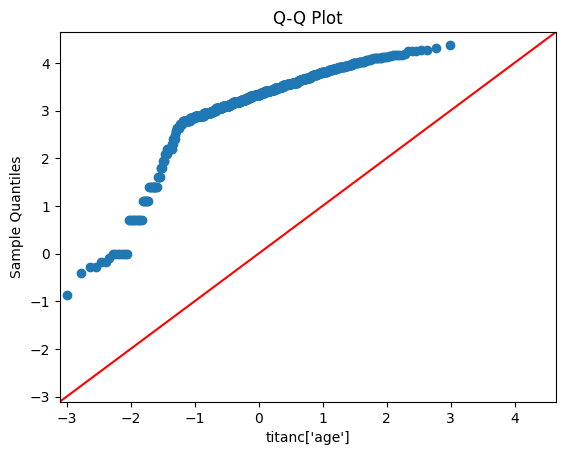

In [1]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate some data for this
# demonstration.
df=sns.load_dataset('titanic')
data=df['age']
data=data.dropna()
# Take natural log of the value of age in the data:
lognorm_dataset= np.log(data)
 

#generate dataset that contains 1000 log-normal distributed values
#lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(lognorm_dataset, line='45')

plt.title("Q-Q Plot")
plt.xlabel("titanc['age']")
#plt.ylabel("in_array")
plt.show()

> Visual Method 2-2: Create a  Q-Q Plot (Random Variate)\
>The following pyhton code shows how to create a (quantile-quantile)Q-Q Plot for a dataset that follows a (y=ln(x), loge )


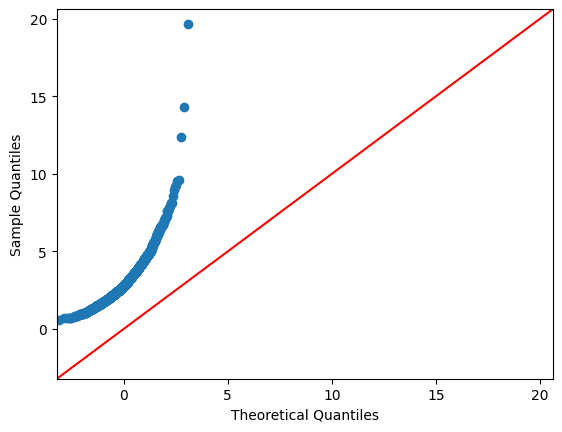

In [60]:
import math
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(lognorm_dataset, line='45')

plt.show()

#### 3. (Formal Statistical Test) Perform a Shapiro-Wilk Test.
 
 If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.

>Method 3-1-2: Perform a Shapiro-Wilk Test (data)\
>The following code shows how to perform a Shapiro-Wilk for a dataset that for a titanic built in dataset (titanic['age'])

In [2]:
import math
import numpy as np
import seaborn as sns
from scipy.stats import shapiro 
from scipy.stats import lognorm

# Generate some data for this
# demonstration.
df=sns.load_dataset('titanic')
data=df['age']
data=data.dropna()
# Take natural log of the value of age in the data:
#lognorm_dataset= np.log(data)
 
#perform Shapiro-Wilk test for normality
stat, p =shapiro(data)
if p > 0.05:
    print("Data probably follows Normal Disribution")
else:
     print("Data probably doesn't follows Normal Disribution")

Data probably doesn't follows Normal Disribution


>Method 3-1-2: Perform a Shapiro-Wilk Test (natural log data)\
>The following code shows how to perform a Shapiro-Wilk for a dataset that for a titanic built in dataset y=ln(titanic['age'])

In [65]:
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

# Generate some data for this
# demonstration.
df=sns.load_dataset('titanic')
data=df['age']
data=data.dropna()
# Take natural log of the value of age in the data:
lognorm_dataset= np.log(data)
 
#perform Shapiro-Wilk test for normality
stat, p =shapiro(lognorm_dataset)
if p > 0.05:
    print("Data probably follows Normal Disribution")
else:
     print("Data probably doesn't follows Normal Disribution")


Data probably doesn't follows Normal Disribution


>Method 3-2: Perform a Shapiro-Wilk Test (Log Random Variate)\
>The following code shows how to perform a Shapiro-Wilk for a dataset that follows a log-normal distribution:

In [67]:
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Shapiro-Wilk test for normality
stat, p =shapiro(lognorm_dataset)
if p > 0.05:
    print("Data probably follows Normal Disribution")
else:
     print("Data probably doesn't follows Normal Disribution, p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.")


Data probably doesn't follows Normal Disribution, p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.


#### 4. (Formal Statistical Test) Perform a Kolmogorov-Smirnov Test.

   If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.

>Method 4-1: Perform a Kolmogorov-Smirnov Test(log single Sample data)\
>The following code shows how to perform a Kolmogorov-Smirnov test for a dataset that follows (titanic['age'])

In [70]:
import seaborn as sns
import numpy as np
from scipy.stats import kstest


# Generate some data for this
# demonstration.
df=sns.load_dataset('titanic')
data=df['age']
data=data.dropna()
# Take natural log of the value of age in the data:
log_dataset= np.log(data)
 

#perform Kolmogorov-Smirnov test for normality
stat, p =kstest(log_dataset, 'norm')
if p > 0.05:
    print("Data probably follows Normal Disribution")
else:
     print("Data probably doesn't follows Normal Disribution, p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.")


Data probably doesn't follows Normal Disribution, p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.


>Method 4-2: Perform a Kolmogorov-Smirnov Test(log random single Sample data)\
>The following code shows how to perform a Kolmogorov-Smirnov test for a dataset that follows a log-normal distribution:

In [69]:
import math
import numpy as np
from scipy.stats import kstest
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Kolmogorov-Smirnov test for normality
stat, p =kstest(lognorm_dataset, 'norm')
if p > 0.05:
    print("Data probably follows Normal Disribution")
else:
     print("Data probably doesn't follows Normal Disribution, p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.")



Data probably doesn't follows Normal Disribution, p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.


>Method 4-3: Perform a Kolmogorov-Smirnov Test(two Sample data)\
>The following code shows how to perform a Kolmogorov-Smirnov test for a dataset that follows a (titanic['age','fare'])

In [73]:
import math
import numpy as np
from scipy.stats import ks_2samp
from scipy.stats import lognorm

# Generate some data for this
# demonstration.
df=sns.load_dataset('titanic')

# Sample 1
data1=df['age']
data1=data1.dropna()
# Take natural log of the value of age in the data:
#log_data1= np.log(data1)
 
# Sample 2
data2=df['fare']
data2=data2.dropna()
# Take natural log of the value of age in the data:
#log_data2= np.log(data2)

#perform Kolmogorov-Smirnov test for normality
stat, p =ks_2samp(data1, data2)
if p > 0.05:
    print("Data probably follows Normal Disribution")
else:
     print("Data probably doesn't follows Normal Disribution, p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.")


Data probably doesn't follows Normal Disribution, p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.


>Method 4-4: Perform a Kolmogorov-Smirnov Test(log two Sample data)\
>The following code shows how to perform a Kolmogorov-Smirnov test for a dataset that follows y1,y2=ln(titanic['age','fare'])

In [5]:
import math
import numpy as np
import seaborn as sns
from scipy.stats import ks_2samp
from scipy.stats import lognorm

# Generate some data for this
# demonstration.
df=sns.load_dataset('titanic')

# Sample 1
data1=df['age']
data1=data1.dropna()
# Take natural log of the value of age in the data:
log_data1= np.log(data1)
 
# Sample 2
data2=df['fare']
data2=data2.dropna()
# Take natural log of the value of age in the data:
log_data2= np.log(data2)

#perform Kolmogorov-Smirnov test for normality
stat, p =ks_2samp(log_data1, log_data2)
if p > 0.05:
    print("Data probably follows Normal Disribution")
else:
     print("Data probably doesn't follows Normal Disribution, p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.")


Data probably doesn't follows Normal Disribution, p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.


c:\Users\Uer\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### 5. (Formal Statistical Test) Perform D’Agostino’s K^2 Test
The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

- Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the   distribution.
- Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.


>Method 5-1: Perform D’Agostino’s K^2 Test (data)\
>The following code shows how to Perform D’Agostino’s K^2 Test for a dataset that for a titanic built in dataset (titanic['age'])

In [3]:
# D'Agostino and Pearson's Test
import seaborn as sns
from scipy.stats import normaltest
# demonstration.
df=sns.load_dataset('titanic')
data=df['age']
data=data.dropna()

# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print("[D'Agostino's K^2 Test] Sample looks Gaussian (fail to reject H0)")
else:
	print("[D'Agostino's K^2 Test] Sample does not look Gaussian (reject H0)")

Statistics=18.105, p=0.000
[D'Agostino's K^2 Test] Sample does not look Gaussian (reject H0)


>Method 5-2: Perform D’Agostino’s K^2 Test (Random Variate)\
>The following code shows how to Perform D’Agostino’s K^2 Test for a dataset 

In [2]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print("[D'Agostino's K^2 Test] Sample looks Gaussian (fail to reject H0)")
else:
	print("[D'Agostino's K^2 Test] Sample does not look Gaussian (reject H0)")

Statistics=0.102, p=0.950
[D'Agostino's K^2 Test] Sample looks Gaussian (fail to reject H0)


#### 6- (Formal Statistical Test) Perform Anderson-Darling Test
A statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.


>Method 6-1: Perform Anderson-Darling Test (Dataset)\
>The following code shows how to Perform Anderson-Darling Test for  a dataset that for a titanic built in dataset (titanic['age'])

In [5]:
# Anderson-Darling Test
import seaborn as sns
from scipy.stats import anderson

# demonstration.
df=sns.load_dataset('titanic')
data=df['age']
data=data.dropna()



# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3.823
15.000: 0.573, data does not look normal (reject H0)
10.000: 0.652, data does not look normal (reject H0)
5.000: 0.783, data does not look normal (reject H0)
2.500: 0.913, data does not look normal (reject H0)
1.000: 1.086, data does not look normal (reject H0)


>Method 6-2: Perform Anderson-Darling Test (Random Variate)\
>The following code shows how to Perform Anderson-Darling Test for a random variate

In [4]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


>Critical values in a statistical test are a range of pre-defined significance boundaries at which the H0 can be failed >to be rejected if the calculated statistic is less than the critical value. Rather than just a single p-value, the test >returns a critical value for a range of different commonly used significance levels.

>We can interpret the results by failing to reject the null hypothesis that the data is normal if the calculated test >statistic is less than the critical value at a chosen significance level.

>We can see that at each significance level, the test has found that the data follows a normal distribution

----

## Numerical Data Scaling Methods
Both normalization and standardization can be achieved using the scikit-learn library.


#### Data Normalization (min-max Scaler)
Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.

A value is normalized as follows:

>y = (x – min) / (max – min)
>Where the minimum and maximum values pertain to the value x being normalized.

For example, for a dataset, we could guesstimate the min and max observable values as 30 and -10. We can then normalize any value, like 18.8, as follows:

>y = (x – min) / (max – min)
>y = (18.8 – (-10)) / (30 – (-10))
>y = 28.8 / 40
>y = 0.72


>You can see that if an x value is provided that is outside the bounds of the minimum and maximum values, the resulting >value will not be in the range of 0 and 1. You could check for these observations prior to making predictions and >either remove them from the dataset or limit them to the pre-defined maximum or minimum values.

#### MinMaxScaler

In [6]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


#### Data Standardization

- Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

- Another […] technique is to calculate the statistical mean and standard deviation of the attribute values, subtract the mean from each value, and divide the result by the standard deviation. This process is called standardizing a statistical variable and results in a set of values whose mean is zero and standard deviation is one.


- Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values. You may be able to estimate these values from your training data, not the entire dataset.

>Subtracting the mean from the data is called centering, whereas dividing by the standard deviation is called scaling. >As such, the method is sometime called “center scaling“.

A value is standardized as follows:

>y = (x – mean) / standard_deviation
>Where the mean is calculated as:
>
>mean = sum(x) / count(x)
>And the standard_deviation is calculated as:
>
>standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))

>We can guesstimate a mean of 10.0 and a standard deviation of about 5.0. Using these values, we can standardize the >first value of 20.7 as follows:
>
>y = (x – mean) / standard_deviation
>y = (20.7 – 10) / 5
>y = (10.7) / 5
>y = 2.14


#### Standard Scaler

In [7]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]
